In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#import the countries data from the csv file with an index column of countries
df_morn = pd.read_csv("./week_testing/andy_new.csv")
df_morn.info()

#create columns for counts
counts_1_3 = df_morn['Chan_0_1']
counts_2_3 = df_morn['Chan_0_2']
counts_1_2 = df_morn['Chan_1_2']

timestamps = df_morn['timestamp'].values
print(type(timestamps))
print(df_morn)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Chan_0_1   2297 non-null   int64 
 1   Chan_0_2   2297 non-null   int64 
 2   Chan_1_2   2297 non-null   int64 
 3   timestamp  2297 non-null   object
dtypes: int64(3), object(1)
memory usage: 71.9+ KB
<class 'numpy.ndarray'>
      Chan_0_1  Chan_0_2  Chan_1_2                  timestamp
0            1         1        25   Fri Mar 31 22:00:38 2023
1            0         0        11   Fri Mar 31 22:01:38 2023
2            8         7        23   Fri Mar 31 22:02:38 2023
3            8         4        17   Fri Mar 31 22:03:38 2023
4            5         3        23   Fri Mar 31 22:04:38 2023
...        ...       ...       ...                        ...
2292        13         5        15   Sun Apr  2 12:20:32 2023
2293        11         4        15   Sun Apr  2 12:21:32 2023
2294         5         3   

In [3]:
df_morn.dropna(inplace=True)

In [4]:
df_morn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Chan_0_1   2297 non-null   int64 
 1   Chan_0_2   2297 non-null   int64 
 2   Chan_1_2   2297 non-null   int64 
 3   timestamp  2297 non-null   object
dtypes: int64(3), object(1)
memory usage: 71.9+ KB


In [5]:
df_morn['timestamp'] = pd.to_datetime(df_morn['timestamp'])
df_morn.head()

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp
0,1,1,25,2023-03-31 22:00:38
1,0,0,11,2023-03-31 22:01:38
2,8,7,23,2023-03-31 22:02:38
3,8,4,17,2023-03-31 22:03:38
4,5,3,23,2023-03-31 22:04:38


In [6]:
df_morn.sort_values(by='timestamp', ascending=True, inplace=True)
df_morn.head()

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp
0,1,1,25,2023-03-31 22:00:38
1,0,0,11,2023-03-31 22:01:38
2,8,7,23,2023-03-31 22:02:38
3,8,4,17,2023-03-31 22:03:38
4,5,3,23,2023-03-31 22:04:38


In [7]:
df_morn_counts = df_morn[['timestamp', 'Chan_0_1', 'Chan_0_2', 'Chan_1_2']]
df_morn_counts.columns

Index(['timestamp', 'Chan_0_1', 'Chan_0_2', 'Chan_1_2'], dtype='object')

In [8]:
df_morn_counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2296
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  2297 non-null   datetime64[ns]
 1   Chan_0_1   2297 non-null   int64         
 2   Chan_0_2   2297 non-null   int64         
 3   Chan_1_2   2297 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 89.7 KB


In [9]:
df_morn_counts = df_morn_counts.resample('H', on = 'timestamp', axis=0).mean()
df_morn_counts.head()

,Chan_0_1,Chan_0_2,Chan_1_2
timestamp,,,
2023-03-31 22:00:00,56.961538,10.365385,16.615385
2023-03-31 23:00:00,7.633333,4.950000,14.100000
2023-04-01 00:00:00,7.416667,4.883333,14.700000
2023-04-01 01:00:00,9.116667,6.000000,16.083333
2023-04-01 02:00:00,8.383333,5.850000,15.616667


In [10]:
#df_morn_counts= df_morn.interpolate(method='linear', limit_direction='both')  
#df_morn_counts.drop_duplicates(inplace=True)

#df_morn_counts.head(20)

Text(0.5, 1.0, 'March 18 Morning Individualized Counts')

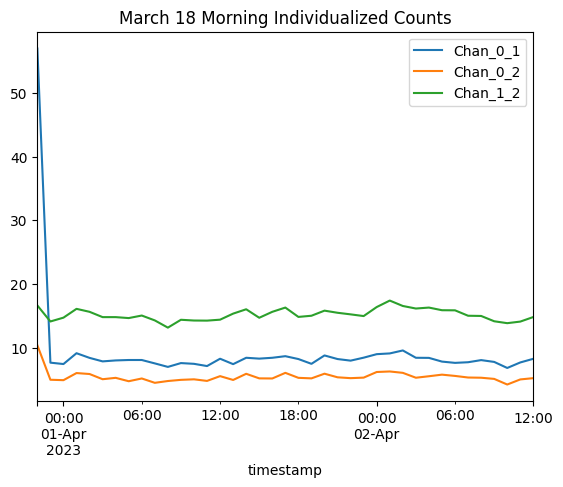

In [11]:
df_morn_counts.plot()
plt.title('March 18 Morning Individualized Counts')

In [12]:
df_morn_counts['average'] = df_morn_counts[['Chan_0_1', 'Chan_0_2', 'Chan_1_2']].mean(axis=1)
df_morn_counts.head()

,Chan_0_1,Chan_0_2,Chan_1_2,average
timestamp,,,,
2023-03-31 22:00:00,56.961538,10.365385,16.615385,27.980769
2023-03-31 23:00:00,7.633333,4.950000,14.100000,8.894444
2023-04-01 00:00:00,7.416667,4.883333,14.700000,9.000000
2023-04-01 01:00:00,9.116667,6.000000,16.083333,10.400000
2023-04-01 02:00:00,8.383333,5.850000,15.616667,9.950000


Text(0.5, 1.0, 'Andy Home March 31 to April 1')

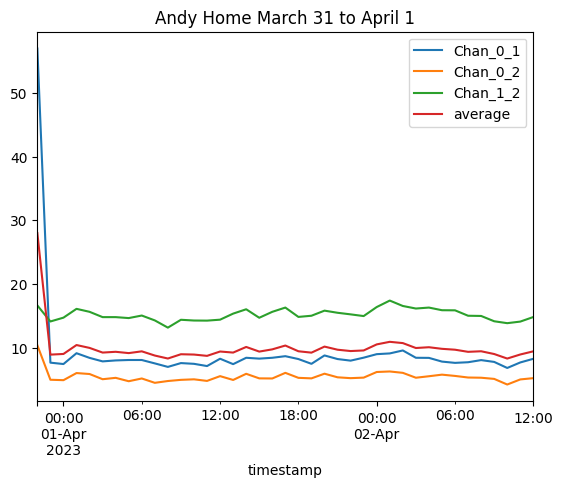

In [13]:
df_morn_counts.plot()
plt.title('Andy Home March 31 to April 1')
#plt.ylim(0,150)

Text(0.5, 1.0, 'March 18 Morning Average Counts')

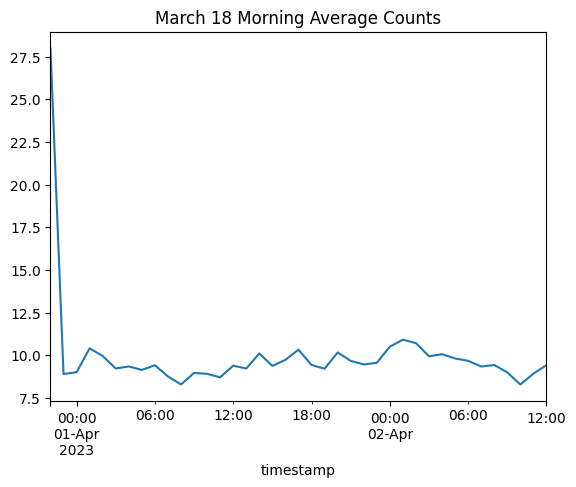

In [14]:
df_morn_counts['average'].plot()
plt.title('March 18 Morning Average Counts')